In [1]:
from pathlib import Path
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linalopes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/linalopes/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/linalopes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/linalopes/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 🧾 Load Markdown Files into a DataFrame

This notebook begins by reading all `.md` files generated by the Docling converter from the `markdown/` folder.

These files are assumed to be individual PDF-to-Markdown conversions, and each one will be treated as a separate document in our NLP pipeline.

We use `pathlib` to locate the files, read them with UTF-8 encoding, and store both the file name and raw text content in a `pandas` DataFrame.

### Code Overview:
- `Path("markdown").glob("*.md")`: lists all `.md` files in the folder.
- Each file is read and appended to a list of dictionaries.
- This list is converted to a `pandas` DataFrame with two columns:
  - `filename`: the name of the file
  - `text`: the full text content of the Markdown file

This structured DataFrame will serve as the input for the next steps of text preprocessing and NLP analysis.


In [3]:
markdown_dir = Path("markdown")
markdown_files = list(markdown_dir.glob("*.md"))
markdown_files

[PosixPath('markdown/Shimizu and Srinivasan - 2022 - Improving classification and reconstruction of imagined images from EEG signals.md'),
 PosixPath('markdown/Moses et al. - 2021 - Neuroprosthesis for Decoding Speech in a Paralyzed Person with Anarthria.md'),
 PosixPath('markdown/Shukla et al. - 2025 - A Survey on Bridging EEG Signals and Generative AI From Image and Text to Beyond.md'),
 PosixPath('markdown/Goldstein et al. - 2024 - Alignment of brain embeddings and artificial contextual embeddings in natural language points to com.md'),
 PosixPath('markdown/Anumanchipalli et al. - 2019 - Speech synthesis from neural decoding of spoken sentences.md'),
 PosixPath('markdown/Guenther et al. - 2024 - Image classification and reconstruction from low-density EEG.md'),
 PosixPath('markdown/Tang et al. - 2023 - Semantic reconstruction of continuous language from non-invasive brain recordings.md'),
 PosixPath('markdown/Pereira et al. - 2018 - Toward a universal decoder of linguistic meaning f

In [4]:
data = []
for file_path in markdown_files:
    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()
        data.append({
            "filename": file_path.name,
            "text": content
        })

df = pd.DataFrame(data)
df.head()

,filename,text
0,Shimizu and Srinivasan - 2022 - Improving clas...,"![Image](data:image/png;base64,iVBORw0KGgoAAAA..."
1,Moses et al. - 2021 - Neuroprosthesis for Deco...,T\n\nh\n\nw\n\nd\n\ni\n\nc\n\ni\n\nn\n\ne\n\n#...
2,Shukla et al. - 2025 - A Survey on Bridging EE...,## A Survey on Bridging EEG Signals and Genera...
3,Goldstein et al. - 2024 - Alignment of brain e...,"1234567890():,;\n\n1234567890():,;\n\n## Align..."
4,Anumanchipalli et al. - 2019 - Speech synthesi...,"![Image](data:image/png;base64,iVBORw0KGgoAAAA..."


## Text Cleaning and Preprocessing

We define a `clean()` function to prepare each Markdown document for NLP analysis. This function applies a classic NLP cleaning pipeline, including regex-based removal of inline images encoded in base64 (commonly found in Markdown).

### 🧼 Cleaning Steps:

1. **Strip and lowercase**: Removes leading/trailing whitespace and converts all text to lowercase.
2. **Remove base64 image Markdown blocks**: Removes lines such as:


In [5]:
def clean(sentence):
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    # Remove base64 image data
    sentence = re.sub(r'!\[.*?\]\(data:image\/png;base64,[^)]+\)', '', sentence)
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers

    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation

    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english')) ## define stopwords
    stop_words.update(['comprising', 'procedure', 'class precision', 'doi', 'https', 'org', "fig", "table",  "illustration", "evaluated", "method", "dataset", "client", 'found', 'significant'])
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatizer = WordNetLemmatizer()
    lemmatized = [
        lemmatizer.lemmatize(word)
        for word in tokenized_sentence_cleaned
    ]

    cleaned_sentence = ' '.join(tokenized_sentence_cleaned)
    return cleaned_sentence

In [6]:
df['clean_text'] = df['text'].apply(clean)

In [7]:
df.head()

,filename,text,clean_text
0,Shimizu and Srinivasan - 2022 - Improving clas...,"![Image](data:image/png;base64,iVBORw0KGgoAAAA...",openaccess citation shimizu h srinivasan r imp...
1,Moses et al. - 2021 - Neuroprosthesis for Deco...,T\n\nh\n\nw\n\nd\n\ni\n\nc\n\ni\n\nn\n\ne\n\n#...,h w c n e original article neuroprosthesis dec...
2,Shukla et al. - 2025 - A Survey on Bridging EE...,## A Survey on Bridging EEG Signals and Genera...,survey bridging eeg signals generative ai imag...
3,Goldstein et al. - 2024 - Alignment of brain e...,"1234567890():,;\n\n1234567890():,;\n\n## Align...",alignment brain embeddings arti unifb cial con...
4,Anumanchipalli et al. - 2019 - Speech synthesi...,"![Image](data:image/png;base64,iVBORw0KGgoAAAA...",published final edited form nature april dois ...


## 🧮 Try out 1 — TF-IDF Vectorization

In this step, we convert the cleaned text from each document into a numerical representation using the **TF-IDF (Term Frequency–Inverse Document Frequency)** method.

TF-IDF helps highlight the most relevant terms in each document by balancing their frequency with how common they are across the entire corpus. This is especially useful for identifying technical terms in research articles, such as those involving EEG and machine learning.

### ✨ Parameters used:
- `max_df=0.8`: Ignore terms that appear in more than 80% of documents (likely not informative)
- `max_features=5000`: Limit the vocabulary size to the 5,000 most frequent terms
- `ngram_range=(1, 2)`: Include both unigrams (single words) and bigrams (two-word phrases)

### 📊 Output:
- The resulting `tfidf_matrix` contains one row per document and one column per term or n-gram.
- The values represent the importance of each term in each document.
- We then convert this matrix into a `pandas.DataFrame` for easier inspection and downstream analysis.

This matrix will serve as one of the semantic representations of your corpus — to be compared later with Word2Vec.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_features = 5000, ngram_range = (1, 2))

tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(tfidf_vectorizer.get_feature_names_out()[:10])

tfidf_matrix = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns = tfidf_vectorizer.get_feature_names_out()
)

tfidf_matrix

TF-IDF matrix shape: (19, 5000)
['ab' 'abilities' 'ability model' 'ability predict' 'ablated' 'ablating'
 'ablation' 'ablation analysis' 'ablations' 'able']


,ab,abilities,ability model,ability predict,ablated,ablating,ablation,ablation analysis,ablations,able,...,zhou,zhu,zscored,zuco,zurich,λa,λa λa,λf,λf λf,τθ
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009292,...,0.006223,0.000000,0.007157,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
1,0.008687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022558,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007799,0.004856,0.000000,0.031861,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.007380,0.007380,0.000000,0.000000,0.000000,0.000000,0.000000,0.002023,...,0.000000,0.000000,0.003117,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
4,0.049001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006362,...,0.000000,0.000000,0.004900,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014878,...,0.009963,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.068683
6,0.004684,0.000000,0.000000,0.000000,0.006158,0.000000,0.000000,0.000000,0.009236,0.007602,...,0.000000,0.002536,0.009369,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002510,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005209,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.036072,0.03006,0.042084,0.03006,0.000000
9,0.000000,0.000000,0.003856,0.000000,0.017122,0.039037,0.046266,0.034158,0.021403,0.006342,...,0.002831,0.000000,0.003256,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000


## 🧠 Topic Modeling with Latent Dirichlet Allocation (LDA)

To explore the underlying thematic structure of the text corpus, we apply **Latent Dirichlet Allocation (LDA)** using the TF-IDF matrix created earlier.

LDA is a generative probabilistic model that assumes each document is a mixture of latent topics, and each topic is a mixture of words. This makes it ideal for **unsupervised topic discovery** in large text collections like scientific abstracts or papers.

### ⚙️ Parameters used:
- `n_components=10`: The model attempts to extract 10 latent topics.
- `max_iter=100`: Increases the number of iterations to allow the model to converge more stably.
- Input: A TF-IDF matrix of all documents in the corpus.

Although LDA is traditionally used with raw word counts (`CountVectorizer`), we are using it here with `TF-IDF` to suppress overly common words and enhance topic interpretability.

### 📋 Output:
- The function `print_topics()` displays the **top 10 words per topic**, ranked by their importance in the topic distribution.
- Each topic can now be manually interpreted based on these keywords — e.g., topics might relate to **language processing**, **brain signals**, **decoding methods**, or **emotions**.

This model allows us to investigate whether the corpus organizes itself semantically in ways that correspond to theoretical or methodological clusters in EEG + ML research.


In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# Instantiate the LDA
n_components = 6
lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

# Fit the LDA on the vectorized documents
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(max_iter=100, n_components=6)

In [10]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [11]:
print_topics(lda_model, tfidf_vectorizer)

Topic 0:
[('human brain', 0.1666732764764634), ('thus', 0.16667321608768995), ('eg', 0.1666732141914786), ('dimension', 0.1666730909524383), ('similarity', 0.16667303303418138), ('correlation', 0.16667293911803147), ('like', 0.16667291330087802), ('sci', 0.16667289494347742), ('regression', 0.1666728327926868), ('ed', 0.16667282198485822)]
Topic 1:
[('unifb', 0.6656846286975608), ('semantic', 0.423792325063854), ('experiment', 0.3825780995686077), ('vectors', 0.37885788140862353), ('sentences', 0.331565577554215), ('passages', 0.32690852024824846), ('voxels', 0.30976623269211034), ('semantic vectors', 0.29646269131660247), ('passage', 0.29373416854213596), ('imaging data', 0.28865405189076965)]
Topic 2:
[('eeg', 1.220971925322886), ('unifb', 0.7494270407044368), ('meg', 0.6130764004330393), ('fmri', 0.5317922988740088), ('word', 0.5173682091355567), ('embeddings', 0.5092960272105541), ('bert', 0.46715802839327036), ('nlp', 0.4591862312427779), ('sentiment', 0.42498778693093386), ('vani

## 🎨 Visualizing Topics with WordClouds, Heatmaps, and PCA

To gain a more intuitive understanding of the topics extracted by LDA, we visualize them using different methods. These visualizations help to reveal patterns, thematic clusters, and topic-document relationships.

---

### ☁️ 1. WordClouds for Each Topic

We generate a word cloud for each topic, using the most representative words (by weight) in the topic vector. This gives us a quick visual sense of what each topic is "about."

- The larger the word in the cloud, the more influential it is in defining that topic.
- We use the `WordCloud` library and plot with `matplotlib`.
- The top 50 weighted words are included per topic.

This is particularly helpful for manually labeling topics or identifying recurring themes like “neural decoding,” “emotion recognition,” or “brain signal processing.”

---

### 🔥 2. Heatmap of Topic Distribution per Document

We visualize how topics are distributed across documents using a heatmap built with `seaborn`.

- Each row represents a document (Markdown file).
- Each column represents a topic.
- The cell intensity indicates how strongly the document is associated with that topic.

We sample up to 20 documents for clarity. This view helps spot:
- Documents that are clearly associated with one topic,
- Multi-thematic documents spanning several topics,
- Outliers that differ from the rest of the corpus.

---

### 🧭 3. PCA Projection of Topic Vectors

Each topic in LDA is a vector over the vocabulary space — essentially a high-dimensional representation of word importance.

To visualize their relationships, we apply **Principal Component Analysis (PCA)** to reduce these vectors to two dimensions:

- PCA is a linear dimensionality reduction technique that finds the two directions (principal components) in the data that explain the most variance.
- We use `sklearn.decomposition.PCA` to project the topic-word distributions (i.e., `lda_model.components_`) into a 2D space.

The result is a scatter plot where:
- Each point represents one topic.
- Proximity between points indicates similarity in their word distributions.
- Topics that cluster together may share similar themes or overlapping vocabulary.

This provides a birds-eye view of the **semantic landscape of your corpus**, showing whether topics are well-separated or blur into one another.


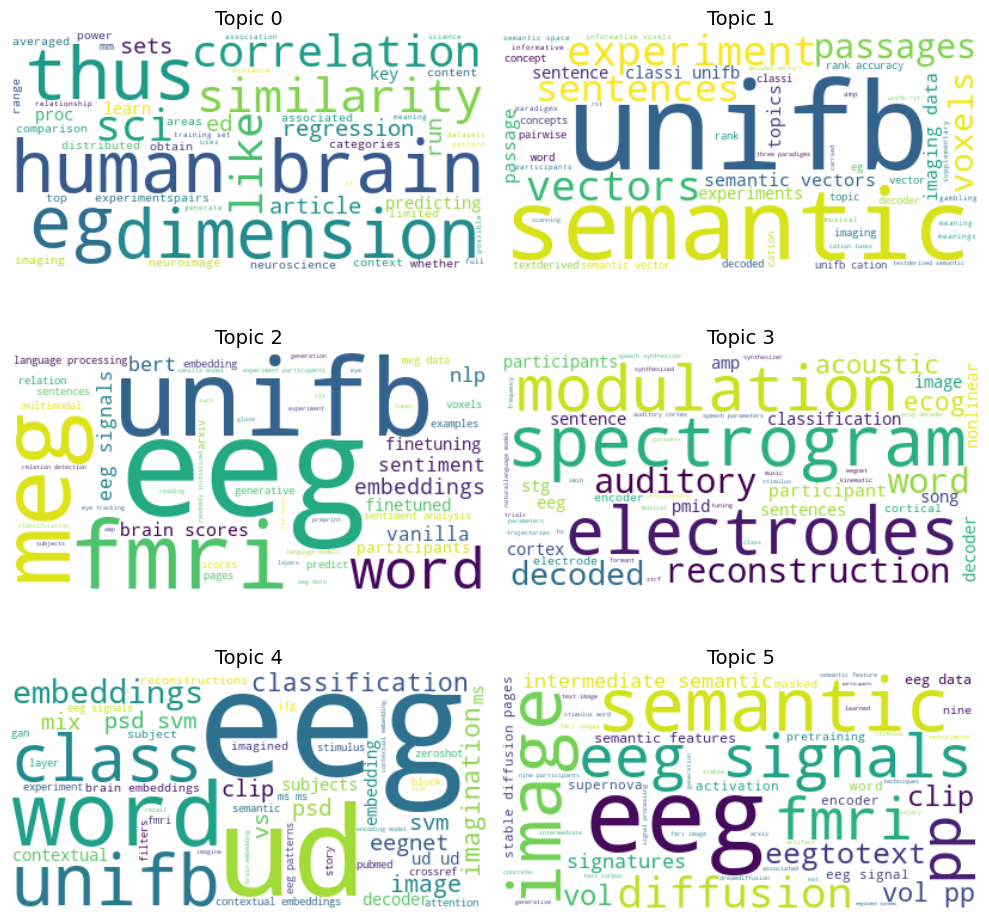

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(lda_model, vectorizer, n_topics=6):
    words = vectorizer.get_feature_names_out()
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
    axes = axes.flatten()  # transforma para lista 1D para facilitar a iteração

    for topic_idx, topic_weights in enumerate(lda_model.components_[:n_topics]):
        top_words = {words[i]: topic_weights[i] for i in topic_weights.argsort()[-50:]}
        wc = WordCloud(background_color='white', max_words=50)
        wc.generate_from_frequencies(top_words)
        axes[topic_idx].imshow(wc, interpolation='bilinear')
        axes[topic_idx].axis('off')
        axes[topic_idx].set_title(f"Topic {topic_idx}", fontsize=14)

    # Desativa eixos extras (se houver)
    for i in range(n_topics, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_wordclouds(lda_model, tfidf_vectorizer, n_topics=n_components)

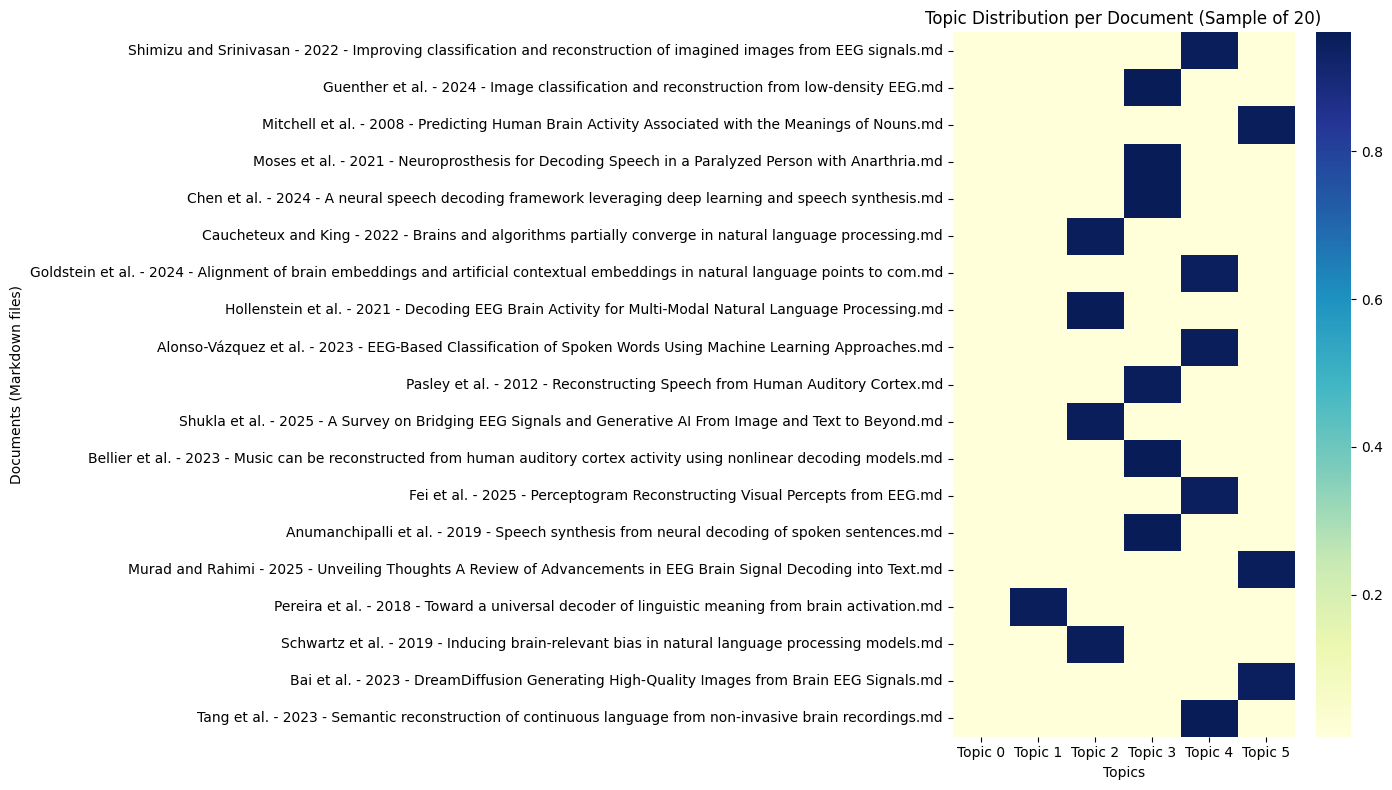

In [13]:
import seaborn as sns

topic_distribution = lda_model.transform(tfidf_matrix)
topic_df = pd.DataFrame(topic_distribution, columns=[f"Topic {i}" for i in range(n_components)])
topic_df['filename'] = df['filename']

n = min(20, len(topic_df))  # Garante que nunca pedimos mais do que temos
sampled = topic_df.sample(n=n, random_state=42).set_index('filename')

# Heatmap dos tópicos por documento
plt.figure(figsize=(14, 8))
sns.heatmap(sampled, cmap='YlGnBu', annot=False)
plt.title("Topic Distribution per Document (Sample of 20)")
plt.xlabel("Topics")
plt.ylabel("Documents (Markdown files)")
plt.tight_layout()
plt.show()


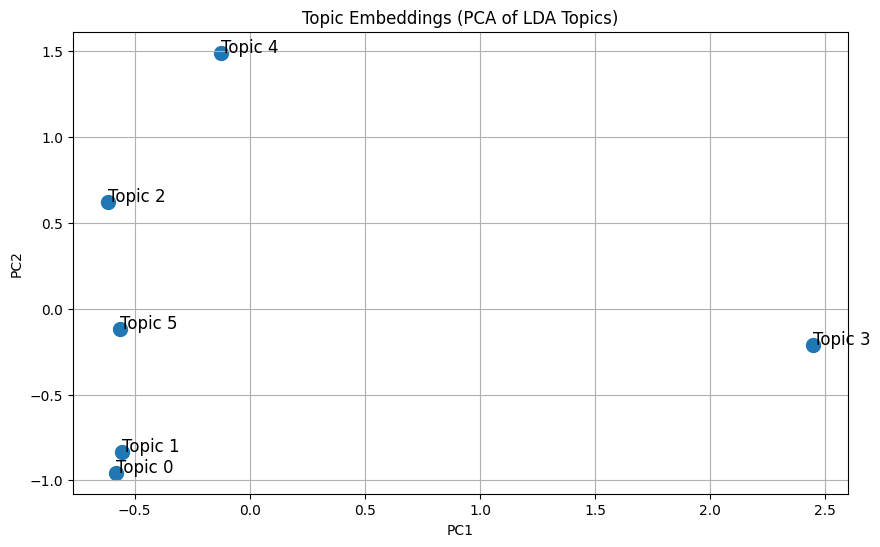

In [14]:
from sklearn.decomposition import PCA

# Redução para 2D dos tópicos como vetores
pca = PCA(n_components=2)
topic_embeddings = pca.fit_transform(lda_model.components_)

plt.figure(figsize=(10, 6))
plt.scatter(topic_embeddings[:, 0], topic_embeddings[:, 1], s=100)

for i, (x, y) in enumerate(topic_embeddings):
    plt.text(x, y, f"Topic {i}", fontsize=12)

plt.title("Topic Embeddings (PCA of LDA Topics)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [15]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Reduz os tópicos para 2D via PCA
pca = PCA(n_components=2)
topic_embeddings = pca.fit_transform(lda_model.components_)

# Extrai palavras-chave principais por tópico
def get_top_words(lda_model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_indices = topic_weights.argsort()[-n_words:][::-1]
        top_terms = [words[i] for i in top_indices]
        topic_keywords.append(", ".join(top_terms))
    return topic_keywords

top_words = get_top_words(lda_model, tfidf_vectorizer)

# Cria DataFrame com embeddings + palavras
topic_data = pd.DataFrame({
    "Topic": [f"Topic {i}" for i in range(len(topic_embeddings))],
    "PC1": topic_embeddings[:, 0],
    "PC2": topic_embeddings[:, 1],
    "Top Words": top_words
})

# Plota com Plotly
fig = px.scatter(
    topic_data,
    x="PC1",
    y="PC2",
    text="Topic",
    hover_data=["Top Words"],
    title="📚 LDA Topics (2D PCA Projection)",
    width=800,
    height=500
)

fig.update_traces(marker=dict(size=12, color="MediumPurple"))
fig.update_layout(showlegend=False)
fig.show()


## Tried run pyLDAvis and it's a nightmare